# Analytics of Pageant playtraces - 10k playtraces

In [1]:
from collections import Counter
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'beauty_pageant/pageant_dendry/random_test_outputs_2/'

In [11]:
all_qualities = {}
all_scene_counts = {}

quality_files = {}
scene_counts_files = {}
for fn in os.listdir(data_path):
    if 'scenes' in fn:
        scenes_data = np.loadtxt(data_path+fn, dtype=str)
        scenes_counter = Counter(scenes_data)
        scene_counts_files[fn[:-3]] = scenes_counter
        for scene, count in scenes_counter.items():
            if scene in all_scene_counts:
                all_scene_counts[scene].append(count)
            else:
                all_scene_counts[scene] = [count]
    else:
        with open(data_path + fn) as f:
            json_data = json.load(f)
        for k, v in json_data['qualities'].items():
            if k in all_qualities:
                all_qualities[k].append(v)
            else:
                all_qualities[k] = [v]
        quality_files[fn[:-3]] = json_data['qualities']

In [37]:
n_runs = len(scene_counts_files)

In [38]:
for k, v in all_qualities.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))
for k, v in all_scene_counts.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))

In [39]:
qualities_df = pd.DataFrame(quality_files).T
scenes_df = pd.DataFrame(scene_counts_files).T

In [40]:
scenes_df.to_csv('pageant_scene_counts.csv')
qualities_df.to_csv('pageant_qualities.csv')

In [41]:
scene_averages = Counter({k: np.mean(v) for k, v in all_scene_counts.items()})


In [42]:
scene_averages.most_common()[-1]

('scioly_2.rox_2', 0.0006)

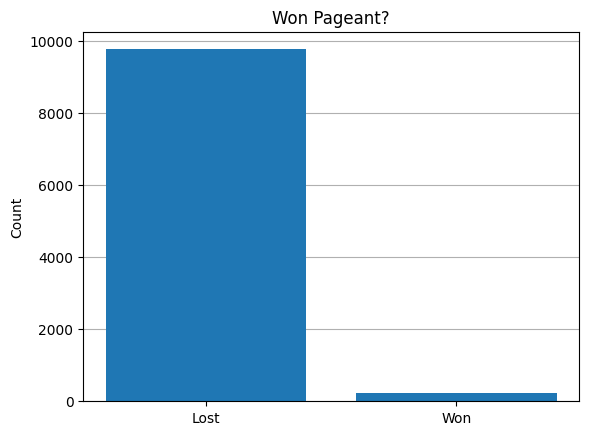

In [48]:
labels, counts = np.unique(all_qualities['achievement_pageant_success'], return_counts=True)
plt.bar(['Lost', 'Won'], counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Won Pageant?')
plt.ylabel('Count')
plt.show()

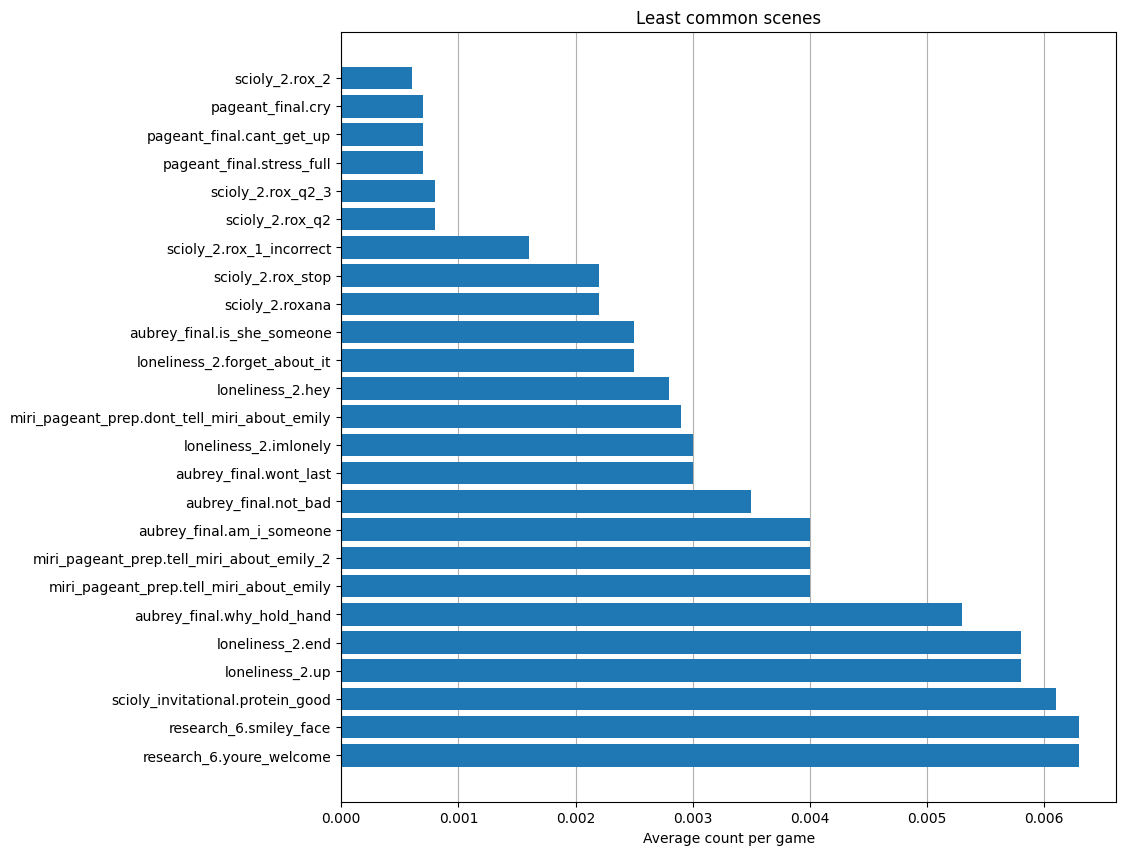

In [43]:
least_common = Counter(scene_averages).most_common()[-25:]
plt.subplots(figsize=(10, 10))
plt.grid(axis='x', zorder=0)
plt.gca().set_axisbelow(True)
plt.barh([x[0] for x in least_common], [x[1] for x in least_common])
plt.xlabel('Average count per game')
plt.title('Least common scenes')
plt.show()